# [보스턴 집값 예측](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)
---
COMPREHENSIVE DATA EXPLORATION WITH PYTHON¶


이번 장에서 할 것

1. 문제이해
 - 각 변수를 살펴보고 이 문제에 대한 의미와 중요성에 대한 분석 시행
 
2. 단변량 학습
 - 종속 변수('SalePrice')에 초점으 맞추고 조금 더 알아본다
 
3. 다변량 학습
 - 종속 변수와 독립 변수의 관계 이해
 
4. 전처리
 - 데이터 셋을 정리하고 이상치 및 범주형 변수 처리

5. 가설 검정
 - 데이터가 부분의 다변량 기법에서 요구하는 가정을 충족하는지 확인
 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns=90
pd.options.display.max_rows=90

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

df_train = train.copy()

## 데이터 확인
 - 데이터셋의 컬럼, 데이터 내용 확인
 - 컬럼과 SalePrice의 관계 확인

In [7]:
# 변수 확인
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

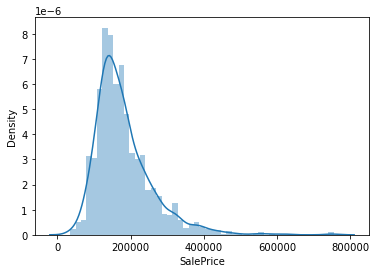

In [14]:
# histogram
sns.distplot(df_train['SalePrice'])

* 정규분포에서 벗어남
* 첨도 : 오른쪽으로 긴 꼬리

In [18]:
# skewness and kurtosis
print("Skewness : %f" % df_train['SalePrice'].skew())
print("kurtosis : %f" % df_train['SalePrice'].kurtosis())

Skewness : 1.882876
kurtosis : 6.536282


### 수치 변수의 관계 확인

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

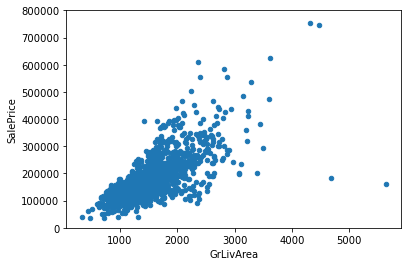

In [24]:
# Scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

<b>GrLiveArea</b>와 <b>SalePrice</b>의 선형 관계 확인

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

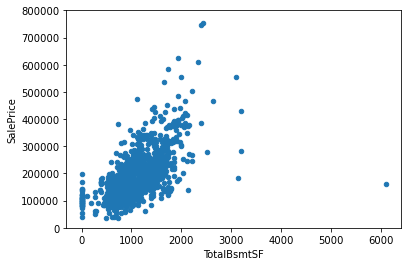

In [30]:
# Scatter plot totlabsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

<b>TotalBsmtSF</b> 또한 <b>SalePrice</b>와 관계가 있다.
강한 선형관계(지수적) 볼 수 있다. 

### 범주형 변수의 관계 확인

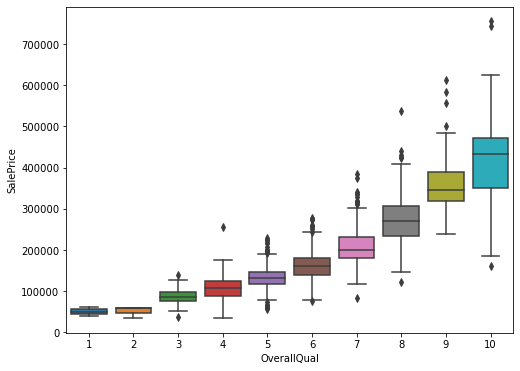

In [31]:
# box plot overallquall/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='SalePrice', data = data
                )

## 결측치 확인
___
데이터 이상 여부 확인하기 위해 결측치 확인한다. (결측치 및 이상치는 분석 결과를 왜곡시킬 수 있다.)

In [20]:
tr.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [41]:
# round(tr.isnull().sum()/len(tr) * 100,2)
# tr.columns[tr.isnull().sum()>=1]

for i in range()

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


[결측치]

'LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', BsmtFinType2','Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt','GarageFinish', GarageQual,'GarageCond', 'PoolQC', 'Fence','MiscFeature'
